In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [2]:
df = pd.read_csv('../Datasets/Covid/covid_19_clean_complete.csv')

### Some general information about the dataset

In [3]:
print(df.info())
df[df['Country/Region']=='Greece'].tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16874 entries, 0 to 16873
Data columns (total 8 columns):
Province/State    7847 non-null object
Country/Region    16874 non-null object
Lat               16874 non-null float64
Long              16874 non-null float64
Date              16874 non-null object
Confirmed         16874 non-null int64
Deaths            16874 non-null int64
Recovered         16874 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.0+ MB
None


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
15481,NaN,Greece,39.0742,21.8243,3/16/20,331,4,8
15767,NaN,Greece,39.0742,21.8243,3/17/20,387,5,8
16053,NaN,Greece,39.0742,21.8243,3/18/20,418,5,8
16339,NaN,Greece,39.0742,21.8243,3/19/20,418,6,8
16625,NaN,Greece,39.0742,21.8243,3/20/20,495,6,19


### Extracting the day and month 

In [4]:
df['Day']=df['Date'].apply(lambda x: int(x.split('/')[1]))           ##Turn Date into
df['Month']=df['Date'].apply(lambda x: int(x.split('/')[0]))         ##usefull, countable data.

### Sorting the countries
Sorting by confirmed cases, increase of confirmed cases over the previous day, deaths and increase of deaths over the previous day.

In [5]:
Country_List = df['Country/Region'].unique() #List of all countries in dataset
Confirmed_List = [] #List of confirmed cases of the countries in Country_List
Deaths_List = [] #List of deaths in above of the countries in Country_List
D_Confirmed_List = [] #List of change in the number of confirmed cases of the countries in Country_List
D_Deaths_List = [] #List of change in the number of deaths of the countries in Country_List

dt = int(str(date.today()).split('-')[2])-int(df[df['Month']==df['Month'].max()]['Day'].max()) # The reference point for date depending on how old the latest data is.

for i in Country_List:
    Confirmed_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Confirmed'].to_numpy()[0])
    Deaths_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Deaths'].to_numpy()[0])
    D_Confirmed_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Confirmed'].to_numpy()[0]-df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt+1)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt+1)).split('-')[2])]['Confirmed'].to_numpy()[0])
    D_Deaths_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Deaths'].to_numpy()[0]-df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt+1)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt+1)).split('-')[2])]['Deaths'].to_numpy()[0])
    
Sorted_Confirmed_List = np.argsort(Confirmed_List)  #Sort by Confirmed Cases
Sorted_Deaths_List = np.argsort(Deaths_List)  # Sort by Deaths
Sorted_D_Confirmed_List = np.argsort(D_Confirmed_List) #Sort by change in Confirmed Cases
Sorted_D_Deaths_List = np.argsort(D_Deaths_List) #Sort by change in Deaths

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


## Printing and vizualizing the latest data

### Based on the confirmed cases

In [6]:
#Making a list of countries with Greece being first while the rest of the countries included are sorted from worst to
#best accounting for the number of confirmed cases.
c_list = [Country_List.tolist().index('Greece')] + np.flip(Sorted_Confirmed_List[-3:]).tolist()

for i in c_list: #Printing the stats on the 4 countries
    print(Country_List[i]+
          ' \nConfirmed:',Confirmed_List[i],
          ' \nincrease over the previous day:',D_Confirmed_List[i],
          ' \nDeaths:',Deaths_List[i],
          ' \nincrease over the previous day:',D_Deaths_List[i],
          ' \n')

print('As of '+str(date.today()-timedelta(days=dt))+'.')

Greece 
Confirmed: 495  
increase over the previous day: 77  
Deaths: 6  
increase over the previous day: 0  

China 
Confirmed: 67800  
increase over the previous day: 0  
Deaths: 3133  
increase over the previous day: 3  

Italy 
Confirmed: 47021  
increase over the previous day: 5986  
Deaths: 4032  
increase over the previous day: 627  

Spain 
Confirmed: 20410  
increase over the previous day: 2447  
Deaths: 1043  
increase over the previous day: 213  

As of 2020-03-20.


### Ploting the confirmed cases of these countries
Note that we only plot the data AFTER the first reported incident with the virus on each country.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


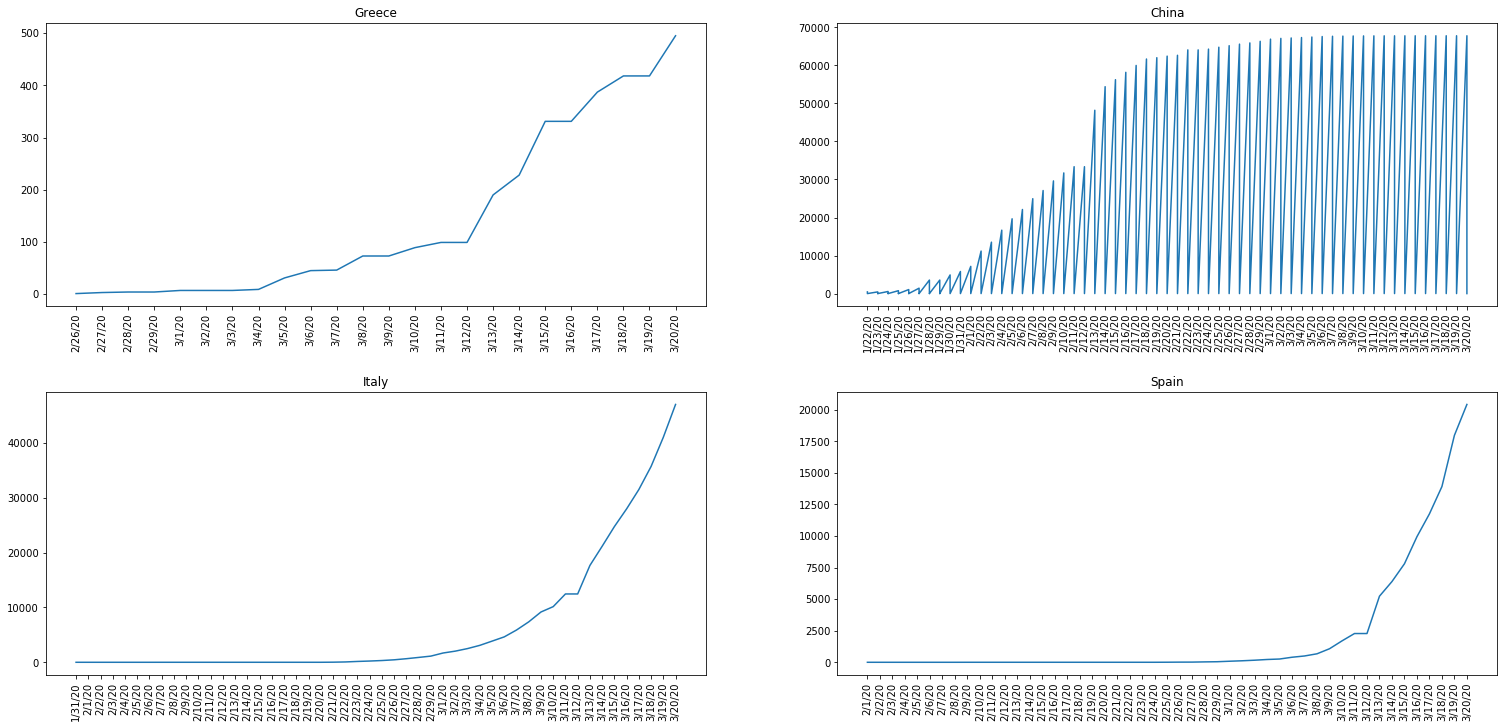

In [7]:
import math

f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(12)
f.set_figwidth(26)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    X = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Date'].to_list()
    Y = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Confirmed'].to_list()
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(90)
    axes[y][x].set_title(Country_List[i])
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1

### Focusing on China
Based on the fact that the 'Confirmed' row contains the total confirmed cases by that date, the data on China seems to be wrongly interpreted.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


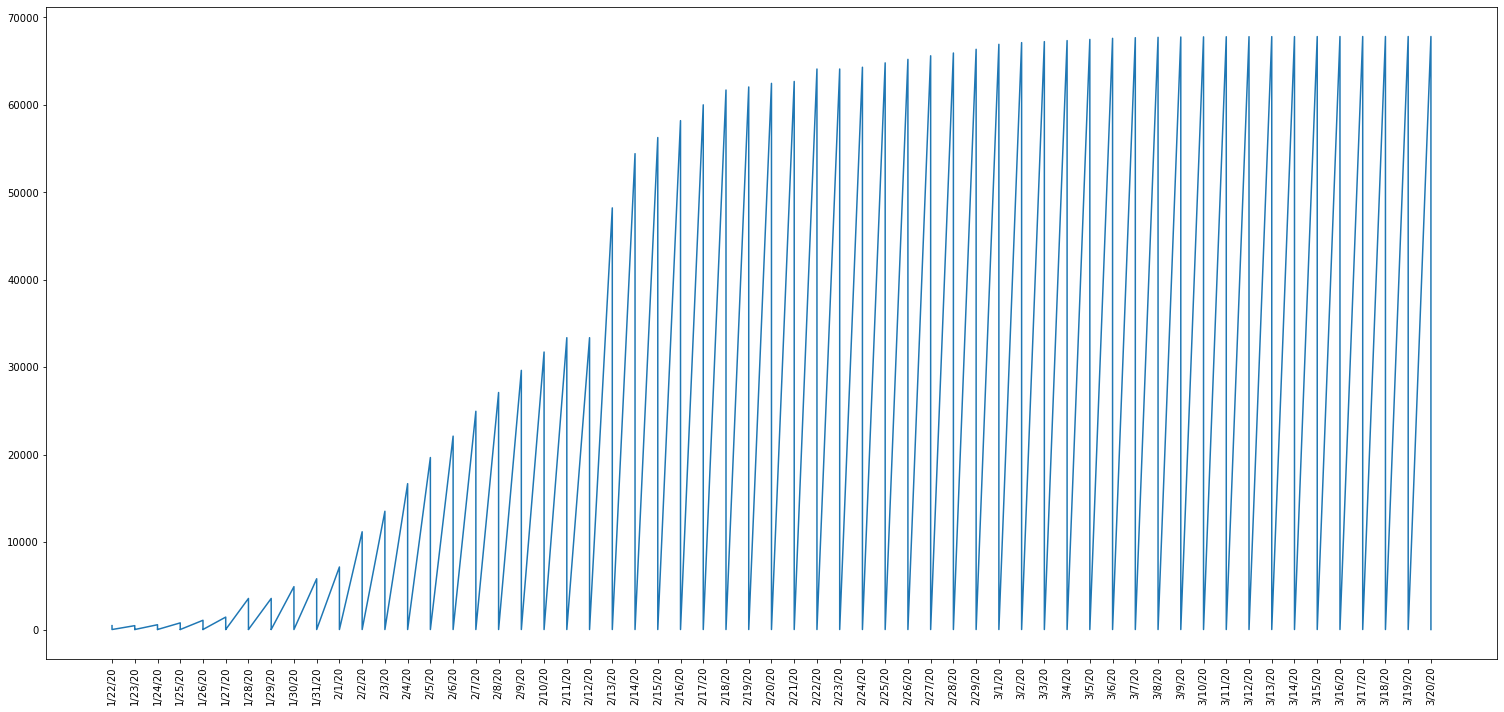

In [8]:
f,ax=plt.subplots(1,1)
f.set_figheight(12)
f.set_figwidth(26)
X = df[df['Country/Region']=='China'][df['Confirmed']>0]['Date'].to_list()
Y = df[df['Country/Region']=='China'][df['Confirmed']>0]['Confirmed'].to_list()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.plot(X,Y)

### Not the case!
Actually, the data for China are sampled based on different states unlike the rest of the countries in the list. You should really take a look at your data before handling it!

In [9]:
df[df['Country/Region']=='China'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Day,Month
154,Hubei,China,30.9756,112.2707,1/22/20,444,17,28,22,1
158,Guangdong,China,23.3417,113.4244,1/22/20,26,0,0,22,1
159,Henan,China,33.8820,113.6140,1/22/20,5,0,0,22,1
160,Zhejiang,China,29.1832,120.0934,1/22/20,10,0,0,22,1
161,Hunan,China,27.6104,111.7088,1/22/20,4,0,0,22,1


In [10]:
df[df['Country/Region']=='Italy'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Day,Month
16,NaN,Italy,43.0,12.0,1/22/20,0,0,0,22,1
302,NaN,Italy,43.0,12.0,1/23/20,0,0,0,23,1
588,NaN,Italy,43.0,12.0,1/24/20,0,0,0,24,1
874,NaN,Italy,43.0,12.0,1/25/20,0,0,0,25,1
1160,NaN,Italy,43.0,12.0,1/26/20,0,0,0,26,1


Making a list of countries that label data per Province/State:

In [11]:
p_c_list = df[~pd.isna(df['Province/State'])]['Country/Region'].unique()

### Ploting the real total confirmed cases per day for China
By summing the cases on each state.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


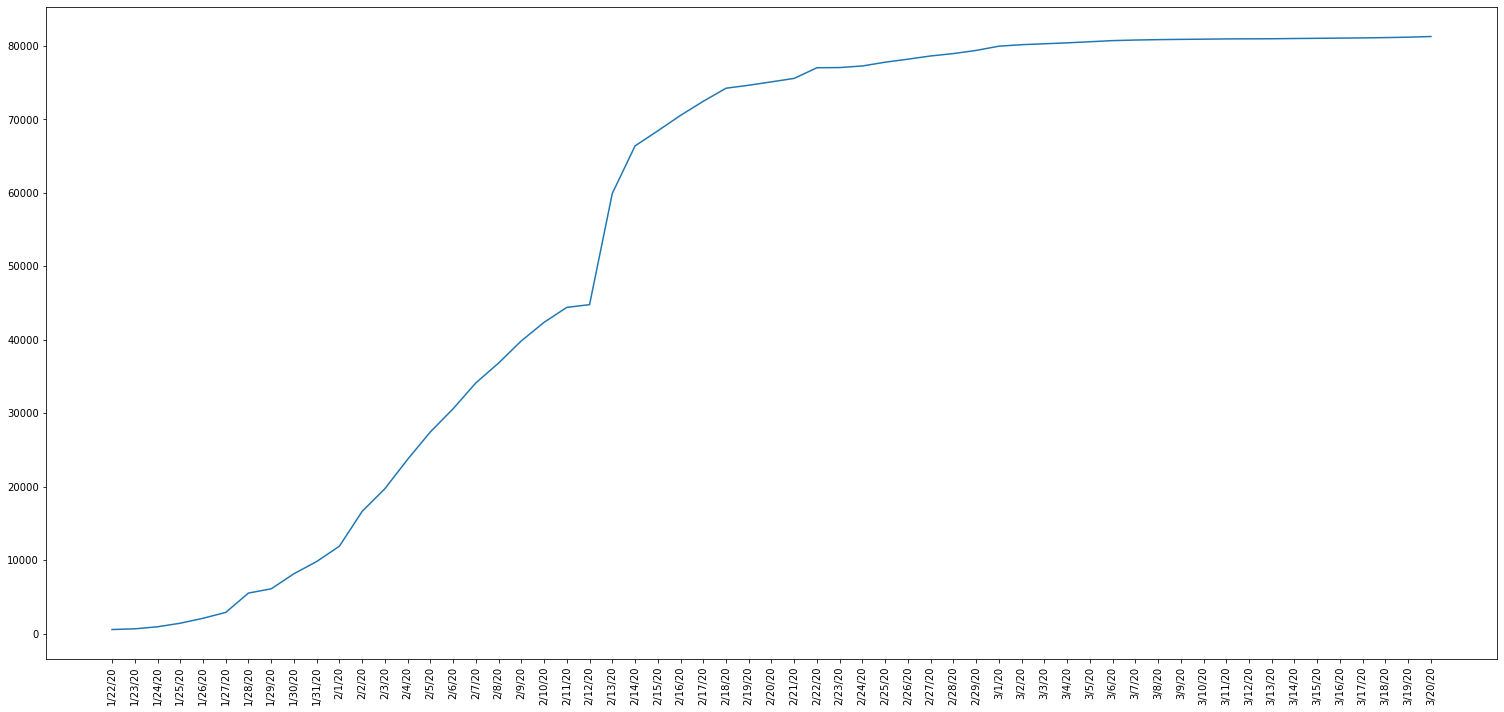

In [12]:
Y_total = []
X = df[df['Country/Region']=='China']['Date'].unique()

for i in X:
    Y_total.append(df[df['Country/Region']=='China'][df['Date']==i]['Confirmed'].sum())

f,ax=plt.subplots(1,1)
f.set_figheight(12)
f.set_figwidth(26)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.plot(X,Y_total)

### Re-ploting correctly
In regards to the 'abnormal' data format for China

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


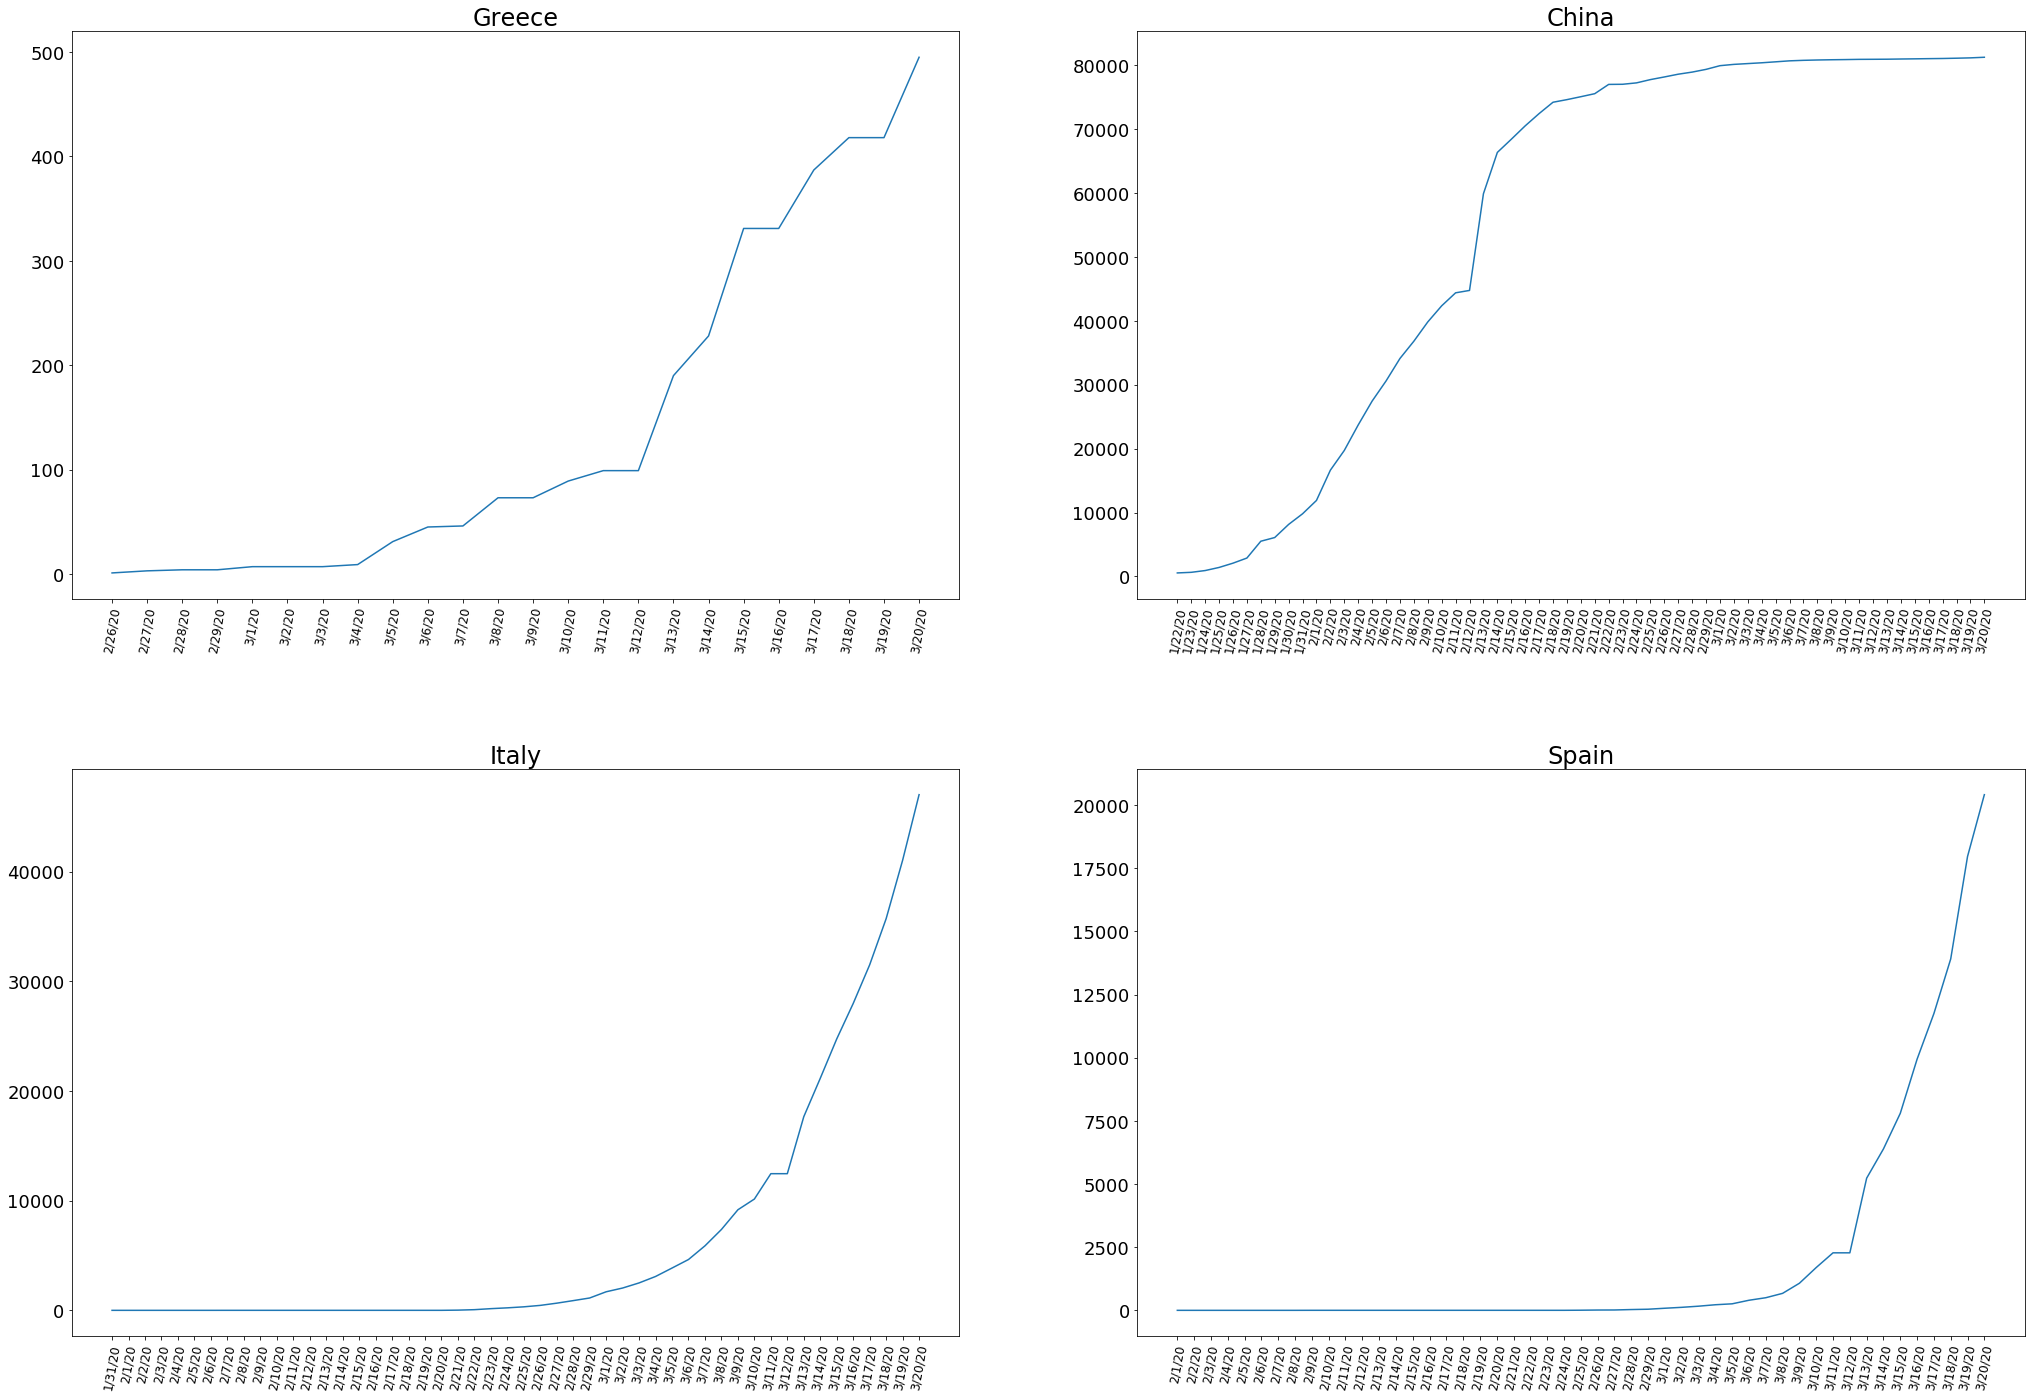

In [13]:
f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(24)
f.set_figwidth(35)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    
    if Country_List[i] not in p_c_list:
        X = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Date'].to_list()
        Y = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Confirmed'].to_list()
    else:
        X = df[df['Country/Region']==Country_List[i]]['Date'].unique()
        Y = []
        for j in X:
            Y.append(df[df['Country/Region']==Country_List[i]][df['Date']==j]['Confirmed'].sum())
        
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(80)
        tick.set_fontsize(12)
        
    for tick in axes[y][x].get_yticklabels():
        tick.set_fontsize(18)
        
    axes[y][x].set_title(Country_List[i],fontsize=24)
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1

It seems that China has impressively managed to reduce the infection rate close to 0, while the rest of the countries are increasing exponentialy.



### Making the same analysis on the countries with most deaths

In [14]:
#Making a list of countries with Greece being first while the rest of the countries included are sorted from worst to
#best accounting for the number of deaths.
c_list = [Country_List.tolist().index('Greece')] + np.flip(Sorted_D_Confirmed_List[-3:]).tolist()

for i in c_list: #Printing the stats on the 4 countries with biggest change of confirmed cases
    print(Country_List[i]+
          ' \nConfirmed:',Confirmed_List[i],
          ' \nincrease over the previous day:',D_Confirmed_List[i],
          ' \nDeaths:',Deaths_List[i],
          ' \nincrease over the previous day:',D_Deaths_List[i],
          ' \n')

print('As of '+str(date.today()-timedelta(days=dt))+'.')

Greece 
Confirmed: 495  
increase over the previous day: 77  
Deaths: 6  
increase over the previous day: 0  

Italy 
Confirmed: 47021  
increase over the previous day: 5986  
Deaths: 4032  
increase over the previous day: 627  

Germany 
Confirmed: 19848  
increase over the previous day: 4528  
Deaths: 67  
increase over the previous day: 23  

Spain 
Confirmed: 20410  
increase over the previous day: 2447  
Deaths: 1043  
increase over the previous day: 213  

As of 2020-03-20.


c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


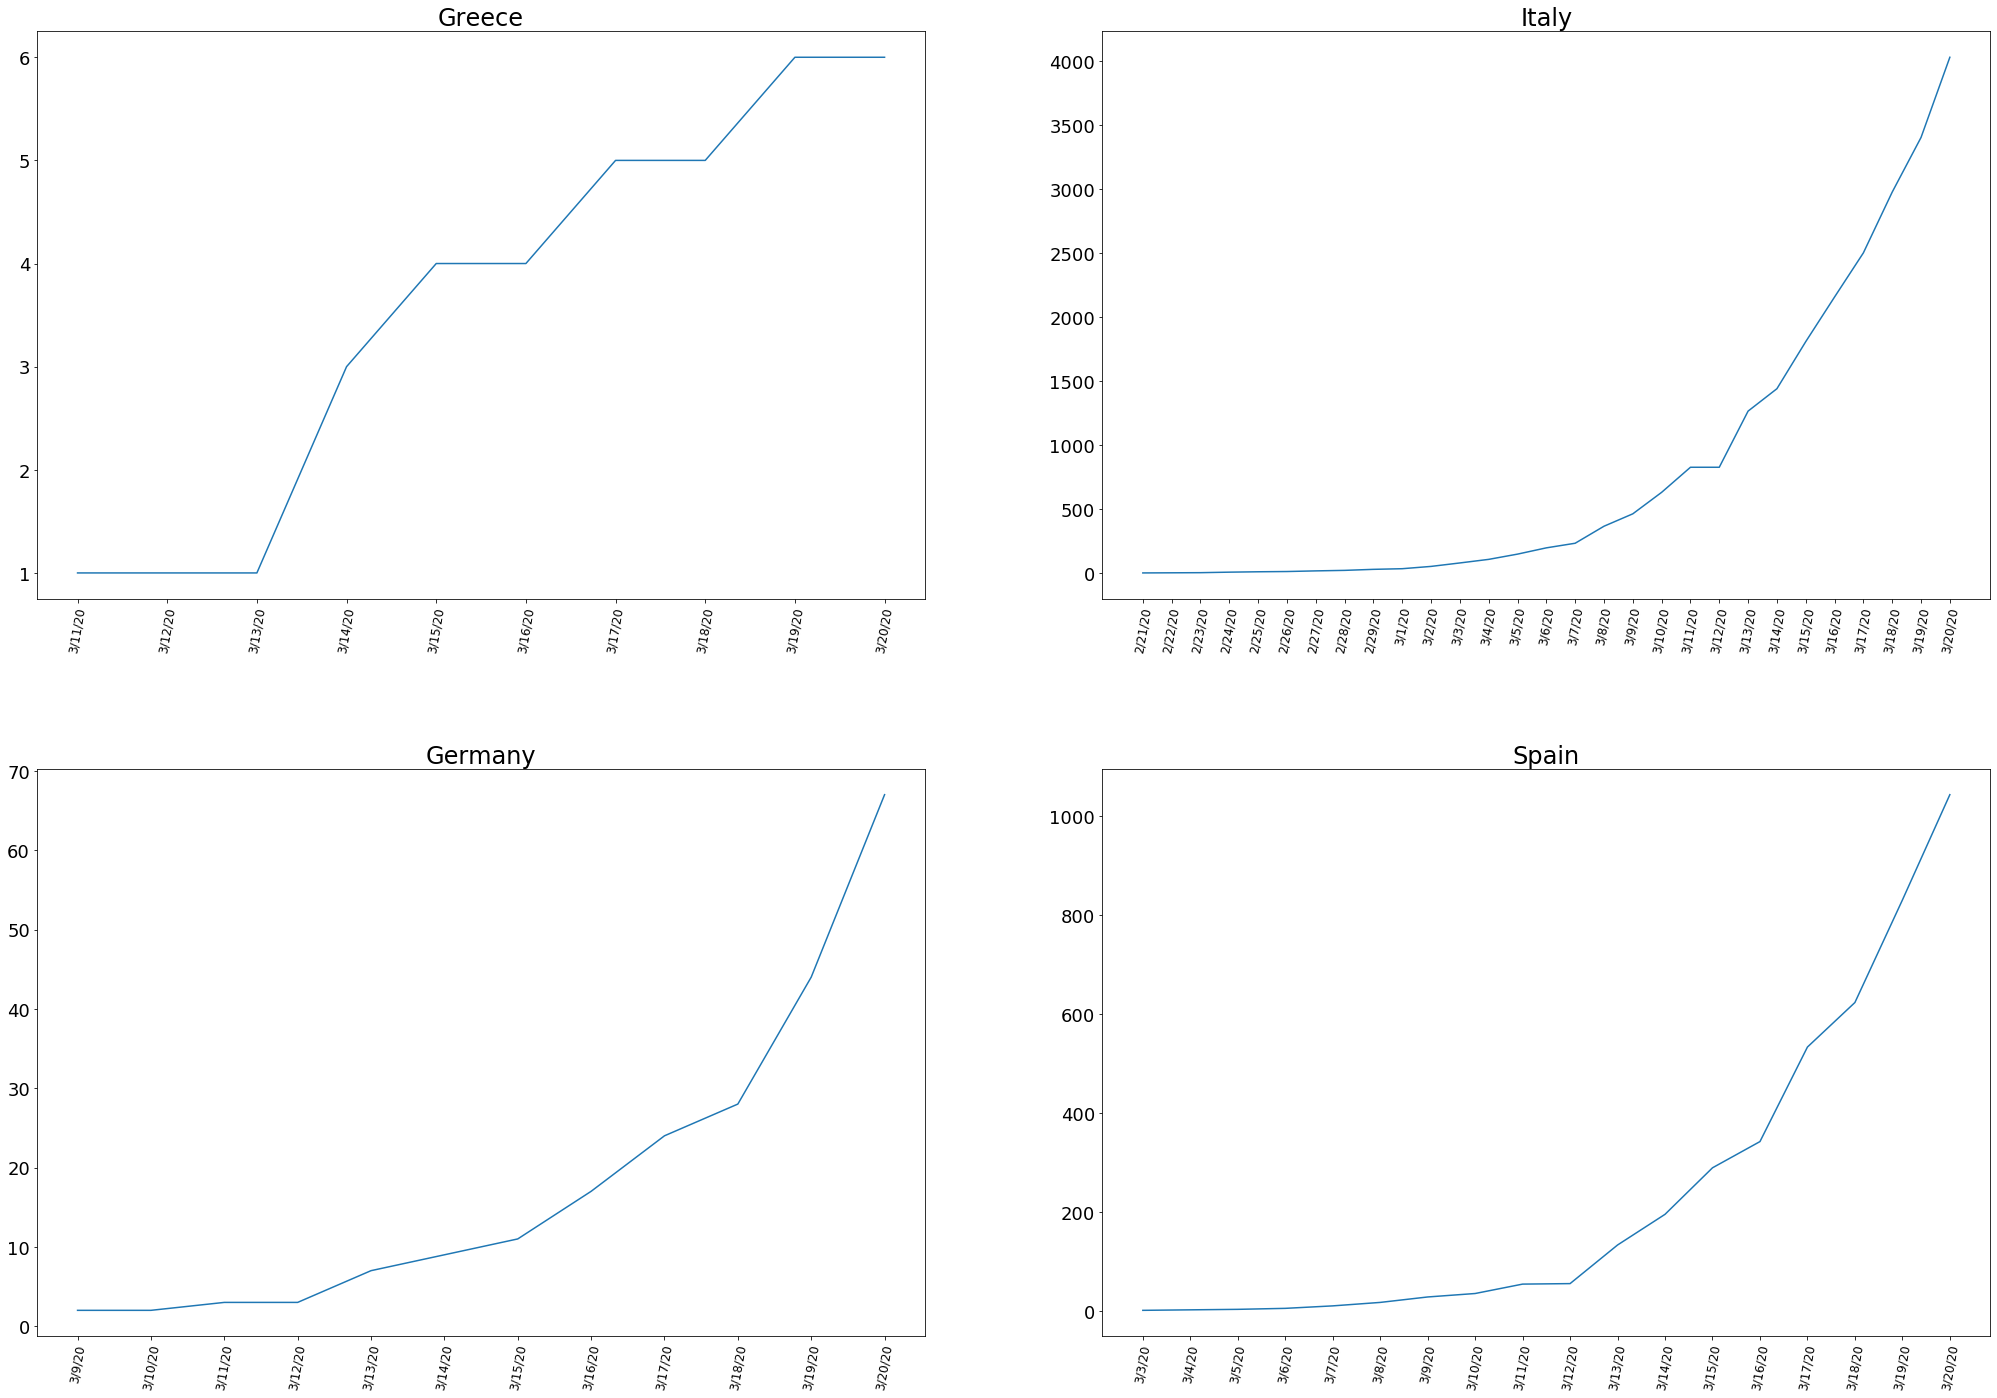

In [15]:
f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(24)
f.set_figwidth(35)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    
    if Country_List[i] not in p_c_list:
        X = df[df['Country/Region']==Country_List[i]][df['Deaths']>0]['Date'].to_list()
        Y = df[df['Country/Region']==Country_List[i]][df['Deaths']>0]['Deaths'].to_list()
    else:
        X = df[df['Country/Region']==Country_List[i]]['Date'].unique()
        Y = []
        for j in X:
            Y.append(df[df['Country/Region']==Country_List[i]][df['Date']==j]['Deaths'].sum())
        
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(80)
        tick.set_fontsize(12)
        
    for tick in axes[y][x].get_yticklabels():
        tick.set_fontsize(18)
        
    axes[y][x].set_title(Country_List[i],fontsize=24)
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1

We can (unfortunately) find out that the number of deaths is directly related to the number of incidents and the mortality rate seems to be confirming that, although it is rather unstable. Italy seems to be hit really hard :( ...

In [16]:
print('Mortality rate per country:')
for i in c_list+[Country_List.tolist().index('China')]:
    print(str(Country_List[i])+' : '+str(int(Deaths_List[i]/Confirmed_List[i]*1000)/10)+'%')
    

Mortality rate per country:
Greece : 1.2%
Italy : 8.5%
Germany : 0.3%
Spain : 5.1%
China : 4.6%
